In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import allinone as aio #fonsiyonların yer aldığı kütüphane

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
pd.set_option('display.max_columns', 999)
plt.style.use('ggplot')

> Keşifsel çalışmalar regresyon dosyasında yapılmıştır.

In [2]:
df = pd.read_excel('HW_Data_Set.xlsx')
df = df.drop(['20_target','50_target',], axis=1)

In [3]:
df.head(3)

ind_5  ind_6   ind_8  ind_9  ind_10  ind_12  ind_13  ind_14  ind_15  \
0     19     17 100.000 85.714  14.286  72.364  60.809  23.800  17.620   
1     24     19 100.000 78.571  21.429  74.276  64.367  11.450  18.160   
2     30     24 100.000 71.429  28.571  75.140  65.916   8.750  17.860   

   ind_16  ind_17  ind_18  ind_19  ind_20  ind_21  ind_22  ind_23  ind_25  \
0  11.730  12.060   9.110       2      15      13       1      56   0.003   
1  12.220  11.327   9.223       0      11      11       1      63   0.003   
2  12.280  10.973   9.312       5      15       9      -1      65   0.003   

   ind_26  ind_27  ind_28  ind_29  ind_30  ind_31  ind_32  ind_33  ind_34  \
0  -0.003   0.000  66.667  93.692 146.593 150.506 154.487 158.010 142.421   
1  -0.003  -0.000  66.667  76.694 140.227 156.903 161.604 169.721 152.634   
2  -0.004  -0.000  66.667  83.910 117.756 154.452 164.016 175.948 160.181   

   ind_35  ind_36  ind_37  ind_39  ind_40  ind_41  ind_42  ind_43  ind_44  \
0 142.023 196.593 184.819  31.940       3  30.753      -5     -22     -22   
1 149.635 201.739 191.986  38.479       3  36.812      -6     -18     -24   
2 155.528 205.238 197.994  28.917       3  39.648      -4     -11     -21   

   ind_45  ind_46  ind_47  ind_48  ind_49  ind_50  ind_51  ind_52  ind_53  \
0     -21     -23     -36     -40     -43     -71     -93     -18      24   
1     -24     -25     -38     -43     -45     -73     -96     -15      20   
2     -22     -24     -36     -42     -44     -72     -95     -13      17   

   ind_56  ind_58  ind_61  ind_62  ind_65  ind_67  ind_70  ind_71  ind_74  \
0      19      -5      -4      10       9      -3      -3       8       8   
1      20      -7      -5      10       9      -4      -3       8       8   
2      19      -9      -6      11      10      -4      -4       8       8   

   ind_77  ind_82  ind_83  ind_88  ind_92  ind_102 ind_109  ind_116  ind_118  \
0       8      -2       8   0.001  20.198   41.915   GREEN      -13    0.003   
1       8      -2       8   0.000  17.871   44.895   GREEN      -16    0.003   
2       8      -2       8   0.000  12.437   45.088   GREEN      -15    0.003   

   ind_122  ind_124  ind_128  ind_130  ind_132  ind_134  ind_136  ind_139  \
0       -3      -25      -50      -83     -125        6        6   60.078   
1       -3      -28      -54      -88     -130        5        6   67.247   
2       -1      -28      -54      -89     -132        5        3   72.441   

   ind_142  ind_145  ind_147  ind_150  ind_153  ind_156  ind_164  ind_168  \
0   60.975    0.228   81.390   70.988   67.107   58.889  -23.190  -12.213   
1   64.078    0.290   84.135   72.527   67.956   59.182  -18.316   -2.463   
2   66.410    0.188   85.392   73.224   68.345   59.319   -9.290    7.346   

   ind_172  ind_176  ind_179  ind_181  ind_188  ind_194  ind_212  ind_217  \
0    8.133  -39.935    7.450    7.990   96.269   96.269   72.470        1   
1   20.369  -32.824   14.460   16.650   98.630   98.630   79.199        1   
2   24.830  -24.436   12.880   17.650   95.721   95.721   82.241        1   

   ind_225  ind_228  ind_234  ind_237  ind_239  ind_241  ind_243  ind_309  \
0    0.040    1.201    0.000   10.000    0.000   99.736    1.200   -0.000   
1    0.040    1.201    0.000    9.091    0.000   99.669    1.200   -0.000   
2    0.040    1.201    0.000    8.333    0.000   99.627    1.200   -0.000   

   ind_310  ind_311  ind_313  ind_315  ind_316  ind_318  ind_321  ind_324  \
0   -1.525   97.980    1.179   -0.757   98.906    1.190   99.157   -0.000   
1   -1.524   97.932    1.179   -0.757   98.860    1.190   99.112   -0.000   
2   -1.524   97.911    1.179   -0.756   98.840    1.190   99.094   -0.000   

   ind_327  ind_330  ind_332  ind_334  ind_338  ind_340  ind_344  ind_345  \
0   12.057   -0.157   20.968   -0.000    1.197   -0.319    0.000    0.000   
1   11.972   -0.157   20.800   -0.000    1.197   -0.319    0.000    0.000   
2   11.888   -0.157   20.635   -0.000    1.197   -0.319    0.000

#### Veri Temizlenmesi

In [4]:
dfCopy = df.copy()

def categorization(df):
    if df['90_target'] < 0:
        return 1
    if df['90_target'] == 0:
        return 2
    if df['90_target'] > 0:
        return 3
dfCopy['buy'] = dfCopy.apply(lambda dfCopy:categorization(dfCopy), axis=1)

dfCopy['ind_28'].replace(-66.66666667, -66.66666666, inplace = True)
dfCopy['ind_28'].replace(66.66666667, 66.66666666, inplace = True)
dfCopy['ind_28'].replace(-66.66666668, -66.66666666, inplace = True)

dfCopy['ind_109'].replace('GREEN', 1, inplace = True)
dfCopy['ind_109'].replace('RED', 0, inplace = True)

dfCopy = dfCopy.drop(['ind_420','ind_422','90_target'], axis=1)

- Karşılaştırma için al-sat kategorisi oluşturuldu, 90_target drop edildi.

In [5]:
dfCopy.head(3)

ind_5  ind_6   ind_8  ind_9  ind_10  ind_12  ind_13  ind_14  ind_15  \
0     19     17 100.000 85.714  14.286  72.364  60.809  23.800  17.620   
1     24     19 100.000 78.571  21.429  74.276  64.367  11.450  18.160   
2     30     24 100.000 71.429  28.571  75.140  65.916   8.750  17.860   

   ind_16  ind_17  ind_18  ind_19  ind_20  ind_21  ind_22  ind_23  ind_25  \
0  11.730  12.060   9.110       2      15      13       1      56   0.003   
1  12.220  11.327   9.223       0      11      11       1      63   0.003   
2  12.280  10.973   9.312       5      15       9      -1      65   0.003   

   ind_26  ind_27  ind_28  ind_29  ind_30  ind_31  ind_32  ind_33  ind_34  \
0  -0.003   0.000  66.667  93.692 146.593 150.506 154.487 158.010 142.421   
1  -0.003  -0.000  66.667  76.694 140.227 156.903 161.604 169.721 152.634   
2  -0.004  -0.000  66.667  83.910 117.756 154.452 164.016 175.948 160.181   

   ind_35  ind_36  ind_37  ind_39  ind_40  ind_41  ind_42  ind_43  ind_44  \
0 142.023 196.593 184.819  31.940       3  30.753      -5     -22     -22   
1 149.635 201.739 191.986  38.479       3  36.812      -6     -18     -24   
2 155.528 205.238 197.994  28.917       3  39.648      -4     -11     -21   

   ind_45  ind_46  ind_47  ind_48  ind_49  ind_50  ind_51  ind_52  ind_53  \
0     -21     -23     -36     -40     -43     -71     -93     -18      24   
1     -24     -25     -38     -43     -45     -73     -96     -15      20   
2     -22     -24     -36     -42     -44     -72     -95     -13      17   

   ind_56  ind_58  ind_61  ind_62  ind_65  ind_67  ind_70  ind_71  ind_74  \
0      19      -5      -4      10       9      -3      -3       8       8   
1      20      -7      -5      10       9      -4      -3       8       8   
2      19      -9      -6      11      10      -4      -4       8       8   

   ind_77  ind_82  ind_83  ind_88  ind_92  ind_102  ind_109  ind_116  ind_118  \
0       8      -2       8   0.001  20.198   41.915        1      -13    0.003   
1       8      -2       8   0.000  17.871   44.895        1      -16    0.003   
2       8      -2       8   0.000  12.437   45.088        1      -15    0.003   

   ind_122  ind_124  ind_128  ind_130  ind_132  ind_134  ind_136  ind_139  \
0       -3      -25      -50      -83     -125        6        6   60.078   
1       -3      -28      -54      -88     -130        5        6   67.247   
2       -1      -28      -54      -89     -132        5        3   72.441   

   ind_142  ind_145  ind_147  ind_150  ind_153  ind_156  ind_164  ind_168  \
0   60.975    0.228   81.390   70.988   67.107   58.889  -23.190  -12.213   
1   64.078    0.290   84.135   72.527   67.956   59.182  -18.316   -2.463   
2   66.410    0.188   85.392   73.224   68.345   59.319   -9.290    7.346   

   ind_172  ind_176  ind_179  ind_181  ind_188  ind_194  ind_212  ind_217  \
0    8.133  -39.935    7.450    7.990   96.269   96.269   72.470        1   
1   20.369  -32.824   14.460   16.650   98.630   98.630   79.199        1   
2   24.830  -24.436   12.880   17.650   95.721   95.721   82.241        1   

   ind_225  ind_228  ind_234  ind_237  ind_239  ind_241  ind_243  ind_309  \
0    0.040    1.201    0.000   10.000    0.000   99.736    1.200   -0.000   
1    0.040    1.201    0.000    9.091    0.000   99.669    1.200   -0.000   
2    0.040    1.201    0.000    8.333    0.000   99.627    1.200   -0.000   

   ind_310  ind_311  ind_313  ind_315  ind_316  ind_318  ind_321  ind_324  \
0   -1.525   97.980    1.179   -0.757   98.906    1.190   99.157   -0.000   
1   -1.524   97.932    1.179   -0.757   98.860    1.190   99.112   -0.000   
2   -1.524   97.911    1.179   -0.756   98.840    1.190   99.094   -0.000   

   ind_327  ind_330  ind_332  ind_334  ind_338  ind_340  ind_344  ind_345  \
0   12.057   -0.157   20.968   -0.000    1.197   -0.319    0.000    0.000   
1   11.972   -0.157   20.800   -0.000    1.197   -0.319    0.000    0.000   
2   11.888   -0.157   20.635   -0.000    1.197   -0.319    0

## PCA

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
dfPCA = dfCopy.copy()

df_drop = dfPCA[['buy','ind_109']]
df_pca = dfPCA.drop(['buy','ind_109'], axis=1)

### PCA-1

In [8]:
pca_scaled = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components = 8)

pca_fit = pca.fit(pca_scaled)
pca0 = pca.fit_transform(pca_scaled)

np.cumsum(np.array(pca_fit.explained_variance_ratio_))

array([0.37352167, 0.49551116, 0.55593151, 0.60059462, 0.63303501,
       0.66376631, 0.6909612 , 0.71126267])

In [9]:
dfPCA0 = pd.DataFrame(pca0)
df_pca_1 = pd.concat([dfPCA0, df_drop], axis=1)

In [10]:
df_pca_1.head(3)

0      1     2      3     4      5      6      7  buy  ind_109
0 -11.713 -3.290 6.574 -1.385 0.681 -1.005 -1.926 -0.772    3        1
1 -12.783 -2.881 5.083 -0.588 1.587 -1.517 -1.917 -0.873    3        1
2 -12.861 -1.262 3.580  0.312 1.907 -1.476 -1.075 -1.107    1        1

### PCA-2

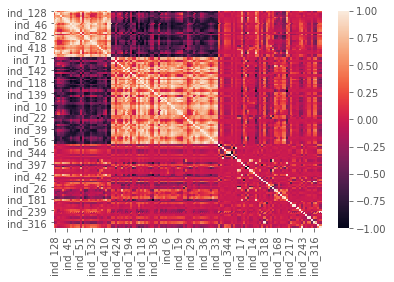

In [11]:
import scipy.cluster.hierarchy as sch

df_pca1 = df_pca.copy()

X = df_pca1.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df_pca1.columns.tolist()[i] for i in list((np.argsort(ind)))]
df_pca1 = df_pca1.reindex(columns, axis=1)

sns.heatmap(df_pca1.corr());

In [12]:
pca_sample1 = df_pca1.loc[:,'ind_128':'ind_392']
pca_sample2 = df_pca1.loc[:,'ind_71':'ind_34']
pca_sample3 = df_pca1.loc[:,'ind_334':]

In [13]:
pca = PCA(n_components = 2)
pca_scaled1 = StandardScaler().fit_transform(pca_sample1)

pca1_fit = pca.fit(pca_scaled1)
pca1 = pca.fit_transform(pca_scaled1)

print(np.cumsum(np.array(pca1_fit.explained_variance_ratio_)))

dfPCA1 = pd.DataFrame(pca1)

[0.63733006 0.81349867]


In [14]:
pca = PCA(n_components = 2)
pca_scaled2 = StandardScaler().fit_transform(pca_sample2)

pca2_fit = pca.fit(pca_scaled2)
pca2 = pca.fit_transform(pca_scaled2)

print(np.cumsum(np.array(pca2_fit.explained_variance_ratio_)))

dfPCA2 = pd.DataFrame(pca2)

[0.56248753 0.7266775 ]


In [15]:
pca = PCA(n_components = 12)
pca_scaled3 = StandardScaler().fit_transform(pca_sample3)

pca3_fit = pca.fit(pca_scaled3)
pca3 = pca.fit_transform(pca_scaled3)

print(np.cumsum(np.array(pca3_fit.explained_variance_ratio_)))

dfPCA3 = pd.DataFrame(pca3)

[0.1222963  0.22251146 0.30208023 0.37840545 0.43527325 0.48722553
 0.53279767 0.57244223 0.60838554 0.64302344 0.67222312 0.70112476]


In [16]:
df_pca_2 = pd.concat([dfPCA1, dfPCA2, dfPCA3, df_drop], axis=1)
df_pca_2.head(3)

0      1      0      1     0      1      2      3     4      5      6  \
0 -7.768 -0.271 -8.189 -1.765 2.997  1.503 -5.334 -1.485 3.723 -0.780 -0.708   
1 -8.302  0.052 -8.845 -1.561 2.853  0.605 -4.406 -1.246 5.023 -0.800 -1.395   
2 -8.194  0.709 -9.070 -0.981 2.978 -0.285 -2.255 -0.819 3.966 -0.998 -1.789   

       7     8      9    10    11  buy  ind_109  
0 -0.166 2.438 -0.248 0.906 1.072    3        1  
1  0.111 2.573 -0.493 0.758 0.980    3        1  
2  0.520 2.775 -0.606 0.803 1.353    1        1

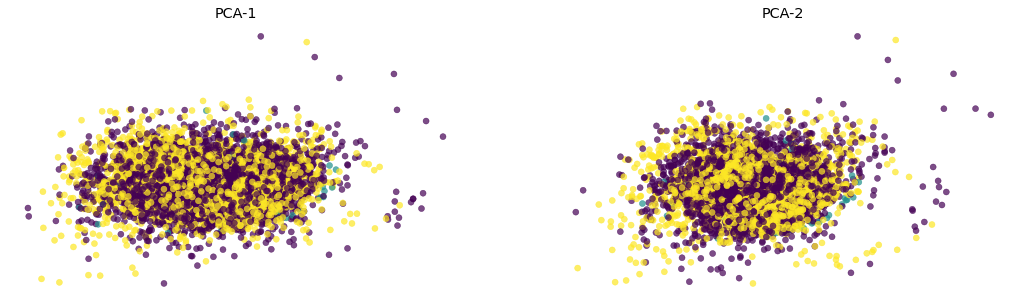

In [17]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.scatter(df_pca_1.iloc[:, 0], df_pca_1.iloc[:, 1], alpha = 0.7, c=df_pca_1.buy, cmap = 'viridis')
plt.title('PCA-1')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.scatter(df_pca_2.iloc[:, 0], df_pca_2.iloc[:, 1], alpha = 0.7, c=df_pca_2.buy, cmap = 'viridis')
plt.title('PCA-2')
plt.axis('off');

# Kmeans

In [18]:
df_pca1 = df_pca_1.drop(['buy'], axis=1)
df_pca2 = df_pca_2.drop(['buy'], axis=1)

#### PCA-1

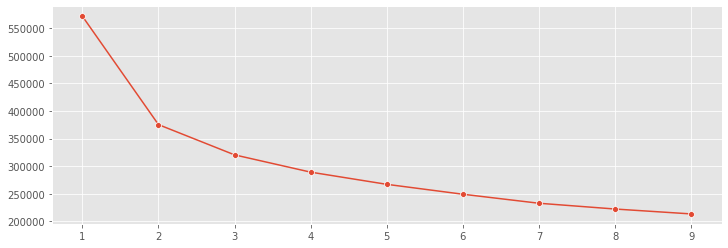

In [19]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,4))
sns.lineplot(range(1,10), wcss, marker = 'o')
plt.show()

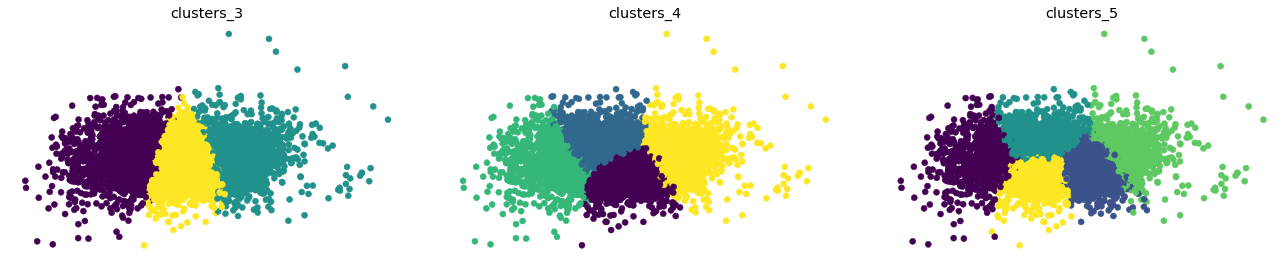

In [20]:
plt.figure(figsize=(18,4))
df_pca1_p1 = pd.DataFrame()
for num, k in enumerate(range(3,6),1):
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca1)
    df_pca1_p1['pred_'+str(k)] = kmeans.labels_
    
    plt.subplot(1, 3, num)
    plt.scatter(df_pca1.iloc[:,0], df_pca1.iloc[:,1], c = df_pca1_p1['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters_'+str(k))
    plt.tight_layout()
    plt.axis('off')

### PCA-2

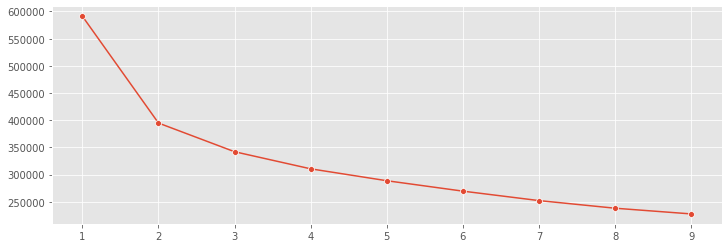

In [21]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,4))
sns.lineplot(range(1,10), wcss, marker = 'o')
plt.show()

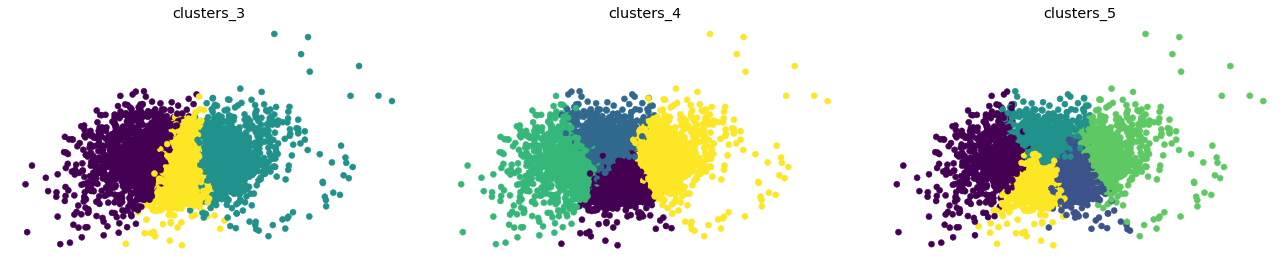

In [22]:
plt.figure(figsize=(18,4))
df_pca2_p2 = pd.DataFrame()
for num, k in enumerate(range(3,6),1):
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_pca1)
    df_pca2_p2['pred_'+str(k)] = kmeans.labels_
    
    plt.subplot(1, 3, num)
    plt.scatter(df_pca2.iloc[:,0], df_pca2.iloc[:,1], c = df_pca2_p2['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters_'+str(k))
    plt.tight_layout()
    plt.axis('off')

## Sınıflandırma vs Kümeleme

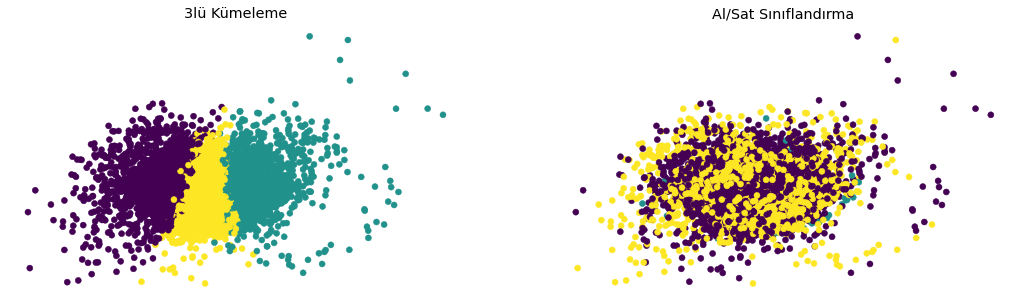

In [23]:
df_pca2_lab = pd.DataFrame()

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(df_pca1)
df_pca2_lab = kmeans.labels_

plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.scatter(df_pca2.iloc[:,0], df_pca2.iloc[:,1], c = df_pca2_lab, cmap = 'viridis');
plt.title('3lü Kümeleme')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.scatter(df_pca2.iloc[:,0], df_pca2.iloc[:,1], c = df_pca_2.buy, cmap = 'viridis');
plt.title('Al/Sat Sınıflandırma')
plt.axis('off');

- Ağağıdaki grafikte sınıflandırma ve kümeleme algoritmalarını karşılaştırmak için, sınıflandırmdan gelen gruplara renk atandı, kümelemeden gelen etiketlere text atandı. Farklılıkları görmek için zoom yapmak gerekir.

In [24]:
colours = 'rbg'
for i in range(df_pca2.shape[0]):
    plt.text(df_pca2.iloc[i, 0], df_pca2.iloc[i, 1], str(df_pca2_lab[i]),
             color = colours[df_pca_2.buy[i]-1],
             fontdict={'weight': 'bold', 'size': 50})